In [10]:
import pandas as pd
import os

In [11]:
# Define the path to the folder
folder_path = 'Sales_Data'

# List to hold the dataframes and the filenames
all_data = []
merged_files = []  # List to store names of merged files

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('_2019.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Append the dataframe to the list
        all_data.append(df)
        # Append the filename to the merged_files list
        merged_files.append(file_name)

# Concatenate all dataframes
merged_data = pd.concat(all_data, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_data.to_csv('merged_sales_data_2019.csv', index=False)

# Print confirmation and list of merged files
print("All files ending with '_2019.csv' have been merged into 'merged_sales_data_2019.csv'")
print("Merged files:")
for file in merged_files:
    print(file)


All files ending with '_2019.csv' have been merged into 'merged_sales_data_2019.csv'
Merged files:
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [12]:
all_data = pd.read_csv('merged_sales_data_2019.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
print(all_data.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [14]:
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [15]:
# Convert 'Order Date' to datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_13096\3713326210.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


In [16]:
# Convert 'Quantity Ordered' to integer
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce', downcast='integer')

In [17]:
# Convert 'Price Each' to floa
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce', downcast='float')

In [18]:
# Check the data types after conversion
print(all_data.dtypes)

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [19]:
# Drop all rows with NaN values
all_data = all_data.dropna()


In [20]:
# Check for any remaining NaNs
print("NaN values in each column after dropping rows:")
print(all_data.isna().sum())

NaN values in each column after dropping rows:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [21]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1.0,11.950000,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1.0,99.989998,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1.0,11.950000,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1.0,1700.000000,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1.0,11.990000,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215"


In [22]:
# Extract the month from 'Order Date' and create a new column 'Month'
all_data['Month'] = all_data['Order Date'].dt.month

In [23]:
# Calculate 'Total Sales'
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [24]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000
6,176562,USB-C Charging Cable,1.0,11.950000,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.950000
7,176563,Bose SoundSport Headphones,1.0,99.989998,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.989998
8,176564,USB-C Charging Cable,1.0,11.950000,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.950000
9,176565,Macbook Pro Laptop,1.0,1700.000000,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.000000
10,176566,Wired Headphones,1.0,11.990000,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.990000


QUESTION 1: What was the best month for sales and how much was earned that month?

In [25]:
# Group by month and sum the 'Total Sales'
monthly_sales = all_data.groupby('Month').sum(numeric_only=True)['Total Sales']


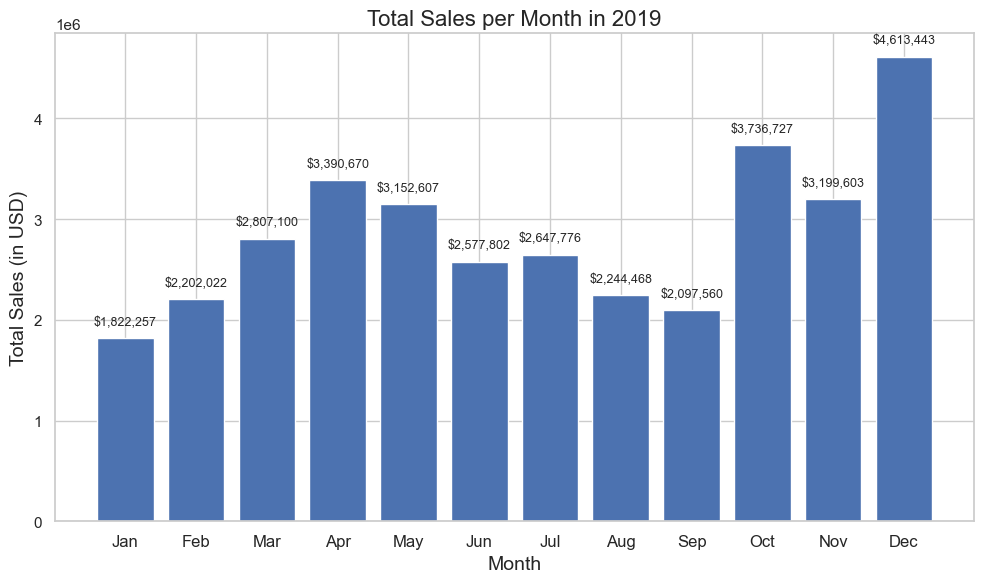

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
colors = ['b'] * len(monthly_sales)
bars = plt.bar(monthly_sales.index, monthly_sales.values, color=colors)

# Add labels and title
plt.title('Total Sales per Month in 2019', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(monthly_sales.index, labels=[ 
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'${yval:,.0f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


ANSWER: December was the best month and total sales was 4.613443e+06

QUESTION 2: What city had the highest number of sales?

In [27]:
#Add a city column
#let's use .apply

In [28]:
# Function to extract city and state
def extract_city_state(address):
    # Split the address by the comma
    parts = address.split(',')
    # The city is the second-to-last part and the state is the last part
    city = parts[-2].strip()
    state = parts[-1].split()[0].strip()  # Extract the state abbreviation
    return f"{city}({state})"

# Apply the function to the 'Purchase Address' column and create a new 'City' column
all_data['City'] = all_data['Purchase Address'].apply(extract_city_state)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston(MA)
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles(CA)


In [29]:
# Group by city and sum the 'Total Sales'
city_sales = all_data.groupby('City').sum(numeric_only=True)['Total Sales']


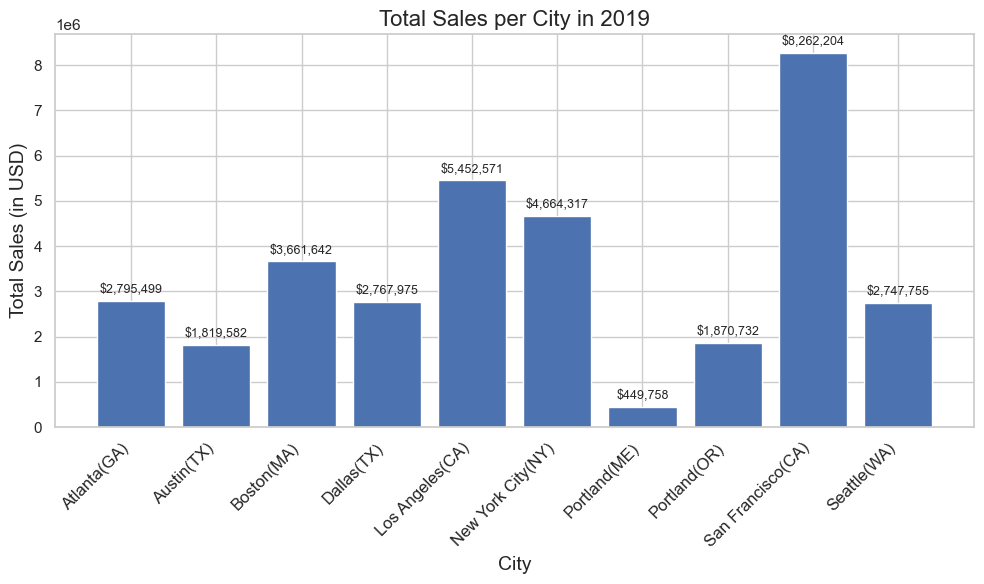

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
colors = ['b'] * len(monthly_sales)
bars = plt.bar(city_sales.index, city_sales.values, color=colors)

# Add labels and title
plt.title('Total Sales per City in 2019', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(city_sales.index, labels=city_sales.index, rotation=45, ha='right', fontsize=12)  # Rotate city labels for better readability

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'${yval:,.0f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


ANSWER: San Francisco(CA)

QUESTION 3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [31]:
# Assuming 'all_data' is your DataFrame
# Convert 'Order Date' to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

In [32]:
# Extract the hour and minute into separate columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston(MA),22,30
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles(CA),14,38
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles(CA),9,27


In [34]:
hourly_count = all_data.groupby('Hour').size()

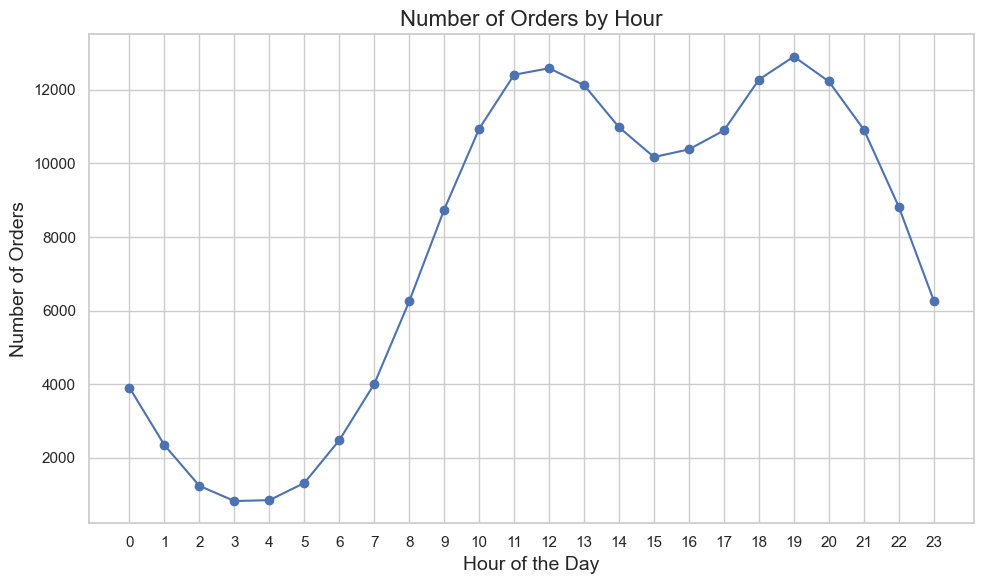

In [35]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_count.index, hourly_count.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Number of Orders by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(hourly_count.index)  # Ensure all hours are displayed on the x-axis

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

ANSWER: My recommendation is 12pm or 7pm

QUESTION 4: What products are often sold together?

In [36]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Assuming 'all_data' is your DataFrame
# Ensure that 'Order ID' and 'Product' columns are present and non-null
all_data = all_data.dropna(subset=['Order ID', 'Product'])

# Find orders with more than one product
grouped = all_data.groupby('Order ID')['Product'].apply(list)

# Create a list of all combinations of products sold together in each order
product_combinations = []
for products in grouped:
    product_combinations.extend(combinations(products, 2))  # 2 is the number of products to combine

# Count the frequency of each combination
combination_counts = Counter(product_combinations)

# Get the most common combinations
most_common_combinations = combination_counts.most_common(10)  # Top 10 most common pairs

# Convert to a DataFrame for easier readability
most_common_df = pd.DataFrame(most_common_combinations, columns=['Product Pair', 'Count'])

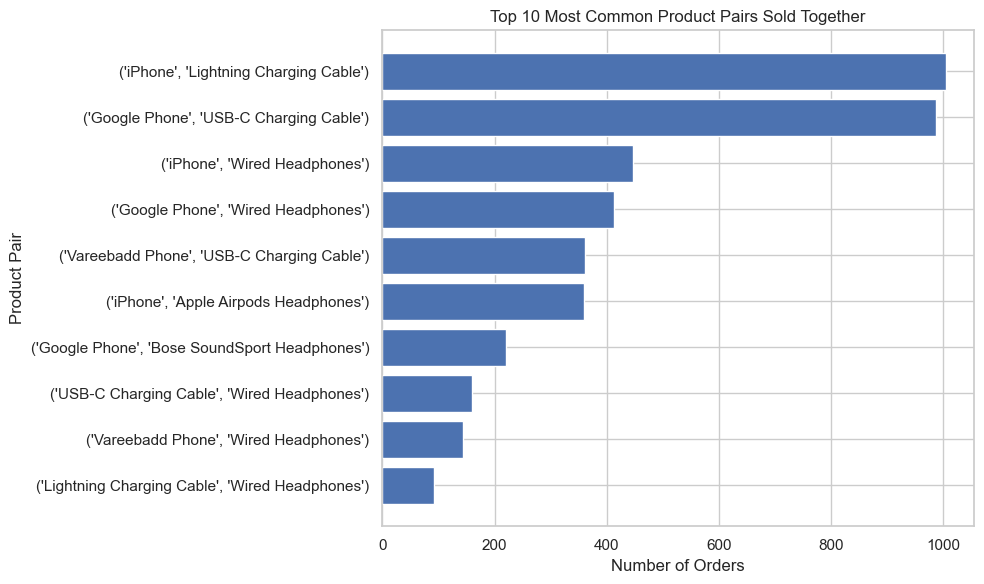

In [37]:
import matplotlib.pyplot as plt

# Plotting the most common product pairs
plt.figure(figsize=(10, 6))
plt.barh(most_common_df['Product Pair'].astype(str), most_common_df['Count'], color='b')
plt.xlabel('Number of Orders')
plt.ylabel('Product Pair')
plt.title('Top 10 Most Common Product Pairs Sold Together')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

ANSWER: iPhone, Lightning Charging Cable

QUESTION 5: What product sold the most?

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'all_data' is your DataFrame and contains 'Product', 'Quantity Ordered', and 'Price Each' columns

# Group by 'Product' and calculate the total quantity ordered
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

# Extract the price for each product (assuming price is consistent per product)
product_prices = all_data.groupby('Product')['Price Each'].first()  # 'first' is used to get the consistent price

# Select the top 10 products by quantity ordered
top_10_products = product_sales.nlargest(10)
top_10_prices = product_prices.loc[top_10_products.index]

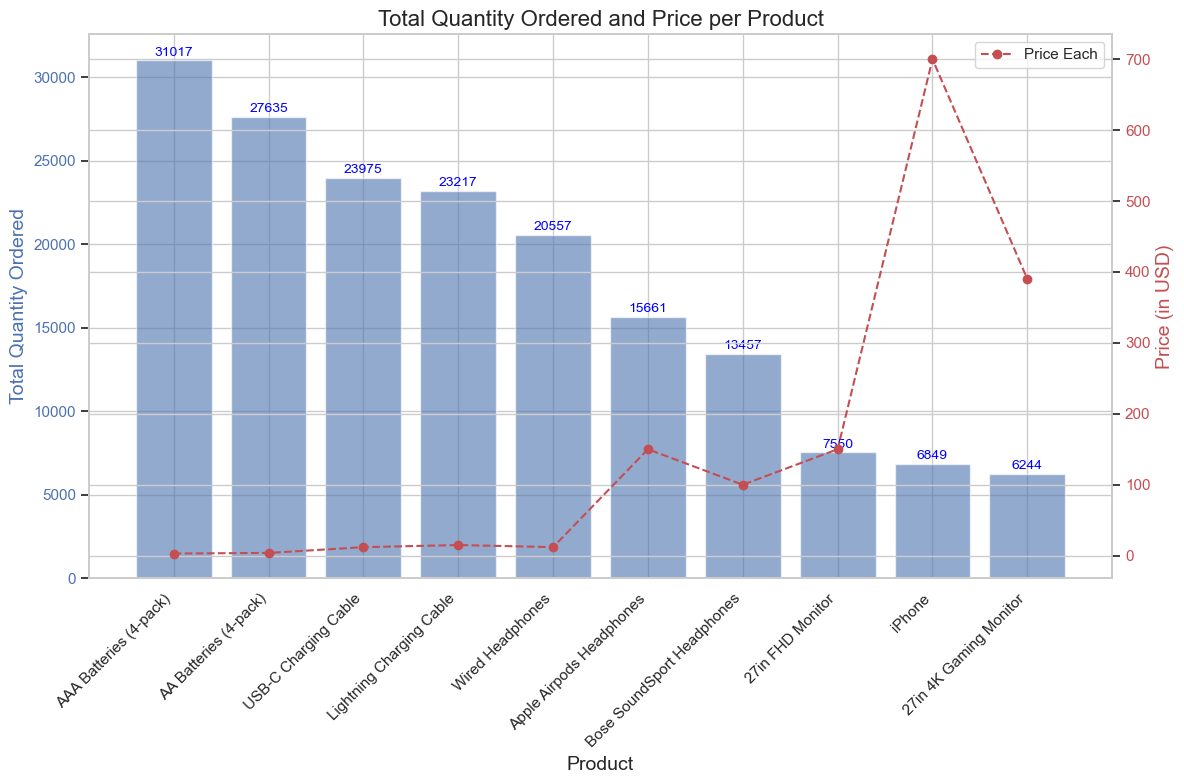

In [41]:
# Plotting the product sales
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the total quantity ordered on the primary y-axis (bars)
bars = ax1.bar(top_10_products.index, top_10_products.values, color='b', alpha=0.6, label='Quantity Ordered')
ax1.set_xlabel('Product', fontsize=14)
ax1.set_ylabel('Total Quantity Ordered', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set x-ticks and labels
ax1.set_xticks(range(len(top_10_products.index)))
ax1.set_xticklabels(top_10_products.index, rotation=45, ha='right')

# Create a secondary y-axis to plot the price of each product (line)
ax2 = ax1.twinx()
ax2.plot(range(len(top_10_products.index)), top_10_prices.values, color='r', marker='o', label='Price Each', linestyle='--')
ax2.set_ylabel('Price (in USD)', fontsize=14, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Total Quantity Ordered and Price per Product', fontsize=16)

# Add value labels on top of each bar for better readability
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval:.0f}', ha='center', va='bottom', fontsize=10, color='blue')

# Add legends
#ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

ANSWER: AAA Batteries (4-pack)
This because it is the cheapest product in the store.